In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\Sentiment-Analysis-for-Product-Review-using-Machine-Learning-and-Deep-Learning--main\Sentiment-Analysis-for-Product-Review-using-Machine-Learning-and-Deep-Learning--main\Amazon_Product_Clothing_Shoes_and_Jewelry.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         55000 non-null  int64  
 1   Unnamed: 0           55000 non-null  int64  
 2   Customer_reviewText  55000 non-null  object 
 3   Unnamed: 3           0 non-null      float64
 4   Unnamed: 4           2 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [4]:
df.shape

(55000, 5)

In [5]:
df.head()


,Unnamed: 0.1,Unnamed: 0,Customer_reviewText,Unnamed: 3,Unnamed: 4
0,65000,65000,"""fits great but not too hot and bulky so it...",NaN,NaN
1,65001,65001,"""great lounge set! i now own both colors a...",NaN,NaN
2,65002,65002,"""i ordered both colors and i am in love wit...",NaN,NaN
3,65003,65003,"""i purchased these for myself and was so ha...",NaN,NaN
4,65004,65004,"""i bought this for my son-in-law. he put i...",NaN,NaN


In [6]:
#convert to string
df['Customer_reviewText'] = df['Customer_reviewText'].astype(str) 
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
Customer_reviewText     object
Unnamed: 3             float64
Unnamed: 4              object
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0.1               0
Unnamed: 0                 0
Customer_reviewText        0
Unnamed: 3             55000
Unnamed: 4             54998
dtype: int64

In [8]:
df = df.drop_duplicates(subset=['Customer_reviewText'])
df

,Unnamed: 0.1,Unnamed: 0,Customer_reviewText,Unnamed: 3,Unnamed: 4
0,65000,65000,"""fits great but not too hot and bulky so it...",NaN,NaN
1,65001,65001,"""great lounge set! i now own both colors a...",NaN,NaN
2,65002,65002,"""i ordered both colors and i am in love wit...",NaN,NaN
3,65003,65003,"""i purchased these for myself and was so ha...",NaN,NaN
4,65004,65004,"""i bought this for my son-in-law. he put i...",NaN,NaN
...,...,...,...,...,...
54995,119995,119995,"""absolutely love this robe. looks like it s...",NaN,NaN
54996,119996,119996,"""this robe fits true to size",NaN,NaN
54997,119997,119997,"""this is a superior satin men's robe. grea...",NaN,NaN
54998,119998,119998,"""this is a great item. no lining",NaN,NaN


In [9]:
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 3','Unnamed: 4'])
df

,Customer_reviewText
0,"""fits great but not too hot and bulky so it..."
1,"""great lounge set! i now own both colors a..."
2,"""i ordered both colors and i am in love wit..."
3,"""i purchased these for myself and was so ha..."
4,"""i bought this for my son-in-law. he put i..."
...,...
54995,"""absolutely love this robe. looks like it s..."
54996,"""this robe fits true to size"
54997,"""this is a superior satin men's robe. grea..."
54998,"""this is a great item. no lining"


In [10]:
from textblob import Word, TextBlob

In [11]:

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['Customer_reviewText'].apply(pol)
df['subjectivity'] = df['Customer_reviewText'].apply(sub)
df

,Customer_reviewText,polarity,subjectivity
0,"""fits great but not too hot and bulky so it...",0.683333,0.866667
1,"""great lounge set! i now own both colors a...",0.812500,0.937500
2,"""i ordered both colors and i am in love wit...",0.300000,0.475000
3,"""i purchased these for myself and was so ha...",0.187500,0.687500
4,"""i bought this for my son-in-law. he put i...",0.700000,0.800000
...,...,...,...
54995,"""absolutely love this robe. looks like it s...",0.182099,0.403086
54996,"""this robe fits true to size",0.350000,0.650000
54997,"""this is a superior satin men's robe. grea...",0.642222,0.785556
54998,"""this is a great item. no lining",0.800000,0.750000


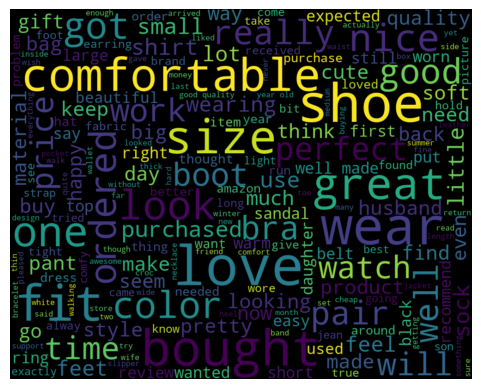

In [12]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df['Customer_reviewText']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [13]:
# Sentiment analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Class'] = df['polarity'].apply(getAnalysis)
df

,Customer_reviewText,polarity,subjectivity,Class
0,"""fits great but not too hot and bulky so it...",0.683333,0.866667,Positive
1,"""great lounge set! i now own both colors a...",0.812500,0.937500,Positive
2,"""i ordered both colors and i am in love wit...",0.300000,0.475000,Positive
3,"""i purchased these for myself and was so ha...",0.187500,0.687500,Positive
4,"""i bought this for my son-in-law. he put i...",0.700000,0.800000,Positive
...,...,...,...,...
54995,"""absolutely love this robe. looks like it s...",0.182099,0.403086,Positive
54996,"""this robe fits true to size",0.350000,0.650000,Positive
54997,"""this is a superior satin men's robe. grea...",0.642222,0.785556,Positive
54998,"""this is a great item. no lining",0.800000,0.750000,Positive


In [14]:
# Get the percentage of positive comment
pcomment = df[df.Class == 'Positive']
pcomment = pcomment['Customer_reviewText']
round((pcomment.shape[0]/df.shape[0]*100), 1)

75.0

In [15]:
# Get the percentage of negative comment
ncomment = df[df.Class == 'Negative']
ncomment = ncomment['Customer_reviewText']
round((ncomment.shape[0]/df.shape[0]*100), 1)

11.4

In [16]:
# Get the percentage of neutral comment
nucomment = df[df.Class == 'Neutral']
nucomment = nucomment['Customer_reviewText']
round((nucomment.shape[0]/df.shape[0]*100), 1)

13.5

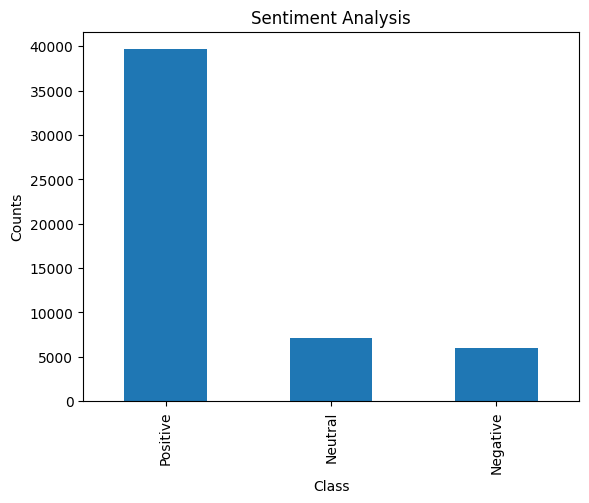

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')
plt.show()

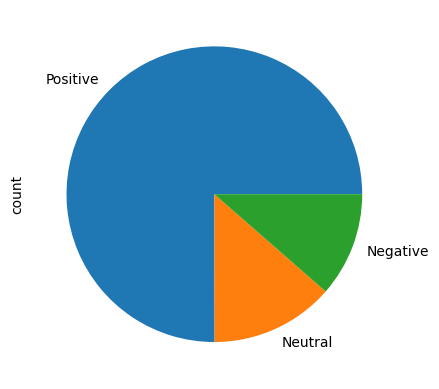

In [18]:
df['Class'].value_counts().plot(kind='pie')
plt.show()

In [19]:
def data_summary(df):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(df.Customer_reviewText) for word in t.strip().split()]
    class_label= [k for k,v in df.Class.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(df[df.Class==label].Customer_reviewText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(df[df.Class==label].Customer_reviewText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df[df.Class==label].Customer_reviewText))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(df)


Class Name :  Positive
Number of Documents:39664
Number of Words:1149214
Number of Unique Words:46153
Most Frequent Words:

the	44521
and	39272
i	35977
a	32126
to	22523
is	20148
for	18924
it	18913
my	14803
are	14359

Class Name :  Neutral
Number of Documents:7161
Number of Words:74729
Number of Unique Words:9129
Most Frequent Words:

"i	2774
a	2445
the	2318
for	1870
i	1671
to	1482
this	1480
my	1420
and	1245
of	1216

Class Name :  Negative
Number of Documents:6044
Number of Words:149128
Number of Unique Words:13471
Most Frequent Words:

the	6022
i	4663
a	4553
and	3848
to	3210
it	2336
is	2267
"i	2188
for	2170
in	1899
Total Number of Unique Words:52945


                          **Preprocessing**

Lower casing

In [20]:
df['Customer_reviewText']=df['Customer_reviewText'].apply(lambda x: x.lower())

Punctuation Remove

In [21]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['Customer_reviewText']= df['Customer_reviewText'].apply(lambda x:remove_punctuation(x))
# df.iloc[[31]]
df

,Customer_reviewText,polarity,subjectivity,Class
0,fits great but not too hot and bulky so it ...,0.683333,0.866667,Positive
1,great lounge set i now own both colors and...,0.812500,0.937500,Positive
2,i ordered both colors and i am in love with...,0.300000,0.475000,Positive
3,i purchased these for myself and was so hap...,0.187500,0.687500,Positive
4,i bought this for my soninlaw he put it on...,0.700000,0.800000,Positive
...,...,...,...,...
54995,absolutely love this robe looks like it sho...,0.182099,0.403086,Positive
54996,this robe fits true to size,0.350000,0.650000,Positive
54997,this is a superior satin mens robe great s...,0.642222,0.785556,Positive
54998,this is a great item no lining,0.800000,0.750000,Positive


Removing URLs

In [23]:
df['Customer_reviewText'] = df['Customer_reviewText'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

Stopwords

It allows us to get rid of commonly used words.

In [24]:
def remove_stop(x):
  return ",".join([word for word in str(x).split() if word not in stop_words]) #stopwords removal)
df['Customer_reviewText'] = df['Customer_reviewText'].apply(lambda x: remove_stop(x))
df

,Customer_reviewText,polarity,subjectivity,Class
0,"fits,great,hot,bulky,perfect,lounger,beach,wat...",0.683333,0.866667,Positive
1,"great,lounge,set,colors,pleased,excellent,qual...",0.812500,0.937500,Positive
2,"ordered,colors,love,lounge,setsthey,soft",0.300000,0.475000,Positive
3,"purchased,happy,soft,found,2,holes,inside,leg,...",0.187500,0.687500,Positive
4,"bought,soninlaw,put,soon,got,package,loved",0.700000,0.800000,Positive
...,...,...,...,...
54995,"absolutely,love,robe,looks,like,cost,200,im,51...",0.182099,0.403086,Positive
54996,"robe,fits,true,size",0.350000,0.650000,Positive
54997,"superior,satin,mens,robe,great,sizing,good,len...",0.642222,0.785556,Positive
54998,"great,item,lining",0.800000,0.750000,Positive


Remove emoji’s

In [25]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Customer_reviewText'] = df['Customer_reviewText'].apply(lambda x: remove_emoji(x))
df.iloc[[4,6,7,5,8,9,10]]

,Customer_reviewText,polarity,subjectivity,Class
4,"bought,soninlaw,put,soon,got,package,loved",0.700000,0.800000,Positive
6,"husband,works,outside,alaska,shaved,head,hat,e...",0.080000,0.295000,Positive
7,"hard,hat,kind,man",0.154167,0.720833,Positive
5,"hat,arrived,house,shortly,ordered,fits,great",0.400000,0.570000,Positive
8,"like,wearing",0.000000,0.000000,Neutral
9,"bought,hat,christmas,husband,match,tan,carhart...",0.800000,0.750000,Positive
10,"purchased,shoe,feet,great,portion,day,love,sho...",0.340476,0.666667,Positive


Tokenization

break sentences into parts

In [26]:
# df['Customer_reviewText'] = df['Customer_reviewText'].astype(str)

In [27]:


df["Customer_reviewText"]=df["Customer_reviewText"].apply(lambda x: TextBlob(x).words)
df

,Customer_reviewText,polarity,subjectivity,Class
0,"[fits, great, hot, bulky, perfect, lounger, be...",0.683333,0.866667,Positive
1,"[great, lounge, set, colors, pleased, excellen...",0.812500,0.937500,Positive
2,"[ordered, colors, love, lounge, setsthey, soft]",0.300000,0.475000,Positive
3,"[purchased, happy, soft, found,2, holes, insid...",0.187500,0.687500,Positive
4,"[bought, soninlaw, put, soon, got, package, lo...",0.700000,0.800000,Positive
...,...,...,...,...
54995,"[absolutely, love, robe, looks, like, cost,200...",0.182099,0.403086,Positive
54996,"[robe, fits, true, size]",0.350000,0.650000,Positive
54997,"[superior, satin, mens, robe, great, sizing, g...",0.642222,0.785556,Positive
54998,"[great, item, lining]",0.800000,0.750000,Positive


Stemming

In [28]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [29]:
df['Customer_reviewText'] = df['Customer_reviewText'].apply(lambda x: [porter.stem(y) for y in x])
df

,Customer_reviewText,polarity,subjectivity,Class
0,"[fit, great, hot, bulki, perfect, lounger, bea...",0.683333,0.866667,Positive
1,"[great, loung, set, color, pleas, excel, quali...",0.812500,0.937500,Positive
2,"[order, color, love, loung, setsthey, soft]",0.300000,0.475000,Positive
3,"[purchas, happi, soft, found,2, hole, insid, l...",0.187500,0.687500,Positive
4,"[bought, soninlaw, put, soon, got, packag, love]",0.700000,0.800000,Positive
...,...,...,...,...
54995,"[absolut, love, robe, look, like, cost,200, im...",0.182099,0.403086,Positive
54996,"[robe, fit, true, size]",0.350000,0.650000,Positive
54997,"[superior, satin, men, robe, great, size, good...",0.642222,0.785556,Positive
54998,"[great, item, line]",0.800000,0.750000,Positive


Lemmatization 

is the process of separating words by root

In [30]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [31]:
df['Customer_reviewText'] = df['Customer_reviewText'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
df

,Customer_reviewText,polarity,subjectivity,Class
0,"[fit, great, hot, bulki, perfect, lounger, bea...",0.683333,0.866667,Positive
1,"[great, loung, set, color, plea, excel, qualit...",0.812500,0.937500,Positive
2,"[order, color, love, loung, setsthey, soft]",0.300000,0.475000,Positive
3,"[purchas, happi, soft, found,2, hole, insid, l...",0.187500,0.687500,Positive
4,"[bought, soninlaw, put, soon, got, packag, love]",0.700000,0.800000,Positive
...,...,...,...,...
54995,"[absolut, love, robe, look, like, cost,200, im...",0.182099,0.403086,Positive
54996,"[robe, fit, true, size]",0.350000,0.650000,Positive
54997,"[superior, satin, men, robe, great, size, good...",0.642222,0.785556,Positive
54998,"[great, item, line]",0.800000,0.750000,Positive


In [32]:
import matplotlib.pyplot as plt

In [33]:
# distribution of the three classes
df['Class'].value_counts()

Class
Positive    39664
Neutral      7161
Negative     6044
Name: count, dtype: int64

In [34]:
pcomment = df[df.Class == 'Positive'][:18400]
pcomment

,Customer_reviewText,polarity,subjectivity,Class
0,"[fit, great, hot, bulki, perfect, lounger, bea...",0.683333,0.866667,Positive
1,"[great, loung, set, color, plea, excel, qualit...",0.812500,0.937500,Positive
2,"[order, color, love, loung, setsthey, soft]",0.300000,0.475000,Positive
3,"[purchas, happi, soft, found,2, hole, insid, l...",0.187500,0.687500,Positive
4,"[bought, soninlaw, put, soon, got, packag, love]",0.700000,0.800000,Positive
...,...,...,...,...
25174,"[kind, hokey, tri, felt, bulki, though, realli...",0.400000,0.550000,Positive
25175,"[idea, behind, product, great]",0.200000,0.725000,Positive
25177,"[realli, small, good, im, sure, could, fit, go...",0.250000,0.511111,Positive
25178,"[got, beig, trip, nyci, guess, didnt, think, p...",0.348148,0.462963,Positive


In [35]:
ncomment = df[df.Class == 'Negative']
ncomment

,Customer_reviewText,polarity,subjectivity,Class
15,"[unlik, review]",-0.125000,0.375000,Negative
22,"[nice, hat, fit, size, place, put, rank, insig...",-0.010000,0.950000,Negative
24,"[realli, like, size, bag, usual, casual, mode,...",-0.065000,0.661667,Negative
25,"[use, le, sportsac, bag, swim, gear, love, sta...",-0.158333,0.858333,Negative
26,"[bought, handbag, last, spring, wore, summer, ...",-0.116667,0.616667,Negative
...,...,...,...,...
54942,"[ring, brighter, pictur, unlik, review]",-0.125000,0.375000,Negative
54947,"[small, size, order, tri, wear, one, pair, tor...",-0.020833,0.369444,Negative
54958,"[look, silk, boxer, store, day, difficult, fou...",-0.107143,0.767857,Negative
54966,"[order, think, silk, stupid, realli, disappoin...",-0.343333,0.886667,Negative


In [36]:
Neucomment = df[df.Class == 'Neutral']
Neucomment

,Customer_reviewText,polarity,subjectivity,Class
8,"[like, wear]",0.0,0.000000,Neutral
31,"[like, bag, dont, chintz]",0.0,0.000000,Neutral
32,"[bought, bag, differ, design, fabric, australia]",0.0,0.362500,Neutral
58,"[espectacular, sunglass]",0.0,0.000000,Neutral
59,"[feel, solid]",0.0,0.100000,Neutral
...,...,...,...,...
54945,"[ring, oval]",0.0,0.000000,Neutral
54955,"[bought, boxer, short, dad, hospit, heart, con...",0.0,0.000000,Neutral
54959,"[like, product, receiv]",0.0,0.000000,Neutral
54963,"[got, one, set, father, last, year, sleep, tsh...",0.0,0.066667,Neutral


In [37]:
df = pd.concat([pcomment,ncomment,Neucomment], axis = 0)

In [38]:
df.Class.value_counts()

Class
Positive    18400
Neutral      7161
Negative     6044
Name: count, dtype: int64

In [39]:
import seaborn as sns

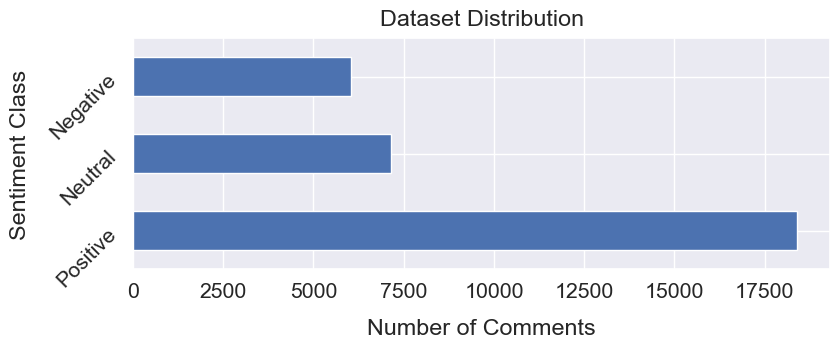

In [40]:
sns.set(font_scale=1.4)
df['Class'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder
df['Class'] = LabelEncoder().fit_transform(df['Class'])
df['Class']

0        2
1        2
2        2
3        2
4        2
        ..
54945    1
54955    1
54959    1
54963    1
54981    1
Name: Class, Length: 31605, dtype: int64

In [42]:
df['Customer_reviewText'] = df['Customer_reviewText'].astype(str)
df['Customer_reviewText']

0        ['fit', 'great', 'hot', 'bulki', 'perfect', 'l...
1        ['great', 'loung', 'set', 'color', 'plea', 'ex...
2        ['order', 'color', 'love', 'loung', 'setsthey'...
3        ['purchas', 'happi', 'soft', 'found,2', 'hole'...
4        ['bought', 'soninlaw', 'put', 'soon', 'got', '...
                               ...                        
54945                                     ['ring', 'oval']
54955    ['bought', 'boxer', 'short', 'dad', 'hospit', ...
54959                        ['like', 'product', 'receiv']
54963    ['got', 'one', 'set', 'father', 'last', 'year'...
54981                          ['husband', 'love', 'item']
Name: Customer_reviewText, Length: 31605, dtype: object

In [43]:
x = df.Customer_reviewText.values
y= df.Class.values


In [44]:
x.shape,y.shape

((31605,), (31605,))

Feature Extraction

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
# Create a TF-IDF Vectorizer
tf_vector =  TfidfVectorizer()
tf_x = tf_vector.fit(x)
tf_x = tf_x.transform(x)

# Create a CountVectorizer
vectorizer = CountVectorizer()
vector_fit =  vectorizer.fit(x)
vector_test = vectorizer.transform(x)

In [47]:
tf_x.shape,vector_test.shape

((31605, 18289), (31605, 18289))

In [48]:
tf_x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
vector_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

over_sampling

In [50]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(tf_x,y)
print(sorted(collections.Counter(y_resampled).items()))

[(np.int64(0), 18400), (np.int64(1), 18400), (np.int64(2), 18400)]


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
#Miscellanous libraries
from collections import Counter

Class=2, n=18400 (58.219%)
Class=0, n=18400 (58.219%)
Class=1, n=18400 (58.219%)


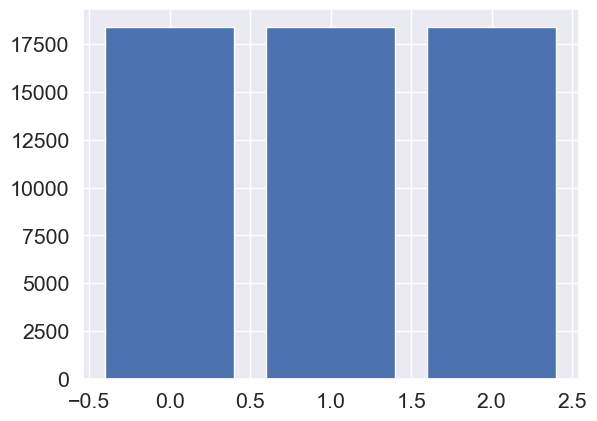

In [52]:
counter = Counter(y_resampled)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [53]:
x_resampled.shape,y_resampled.shape

((55200, 18289), (55200,))

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.80, shuffle=True, random_state=95)

In [55]:
X_train.shape, X_test.shape

((44160, 18289), (11040, 18289))

In [56]:
y_test.shape

(11040,)

ML Algorithm

Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Model fitting
rf.fit(X_train,y_train)
 
#testing the model
rf.score(X_test,y_test)

0.9340579710144927

In [58]:
pred = rf.predict(X_test) 

In [59]:
# comment=['Bad qualilty..... material qualilty is very poor',
#          'Best service ever. On time, products as promised. Great quality.',
#          'I buy this product from bangladesh']
comment = input()
print("Input Text:",comment)
tf1_comment = tf_vector.transform([comment])
result = rf.predict(tf1_comment)
if result[0] == 1:
  print('neutral')
elif result[0] == 0:
  print('negative')
else:
  print('positive')

Input Text: i love the product
positive


Confusion Matrix

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,classification_report 

In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3646
           1       0.92      0.97      0.95      3722
           2       0.96      0.88      0.92      3672

    accuracy                           0.93     11040
   macro avg       0.93      0.93      0.93     11040
weighted avg       0.93      0.93      0.93     11040



In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

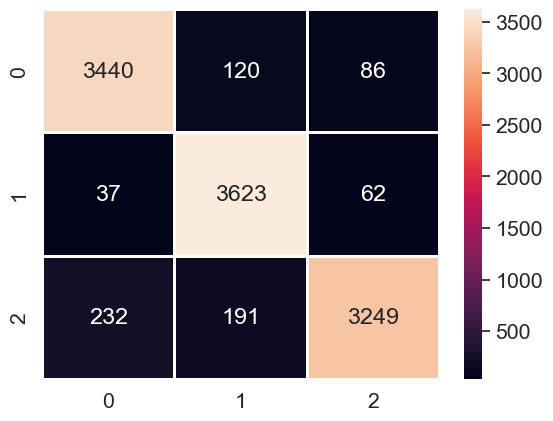

In [63]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Support Vector Machine

In [64]:
from sklearn.svm import SVC

In [65]:
model_svm = SVC()

In [66]:
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

0.9311594202898551

In [67]:
pred = model_svm.predict(X_test)

In [ ]:
comment=['this product is poor','Product is very good, fit is good','where the product is produced']
tf1_comment = tf_vector.transform(comment)
model_svm.predict(tf1_comment)

array([0, 2, 1])

Confusion Matrix

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3646
           1       0.91      0.97      0.94      3722
           2       0.94      0.92      0.93      3672

    accuracy                           0.93     11040
   macro avg       0.93      0.93      0.93     11040
weighted avg       0.93      0.93      0.93     11040



<Axes: >

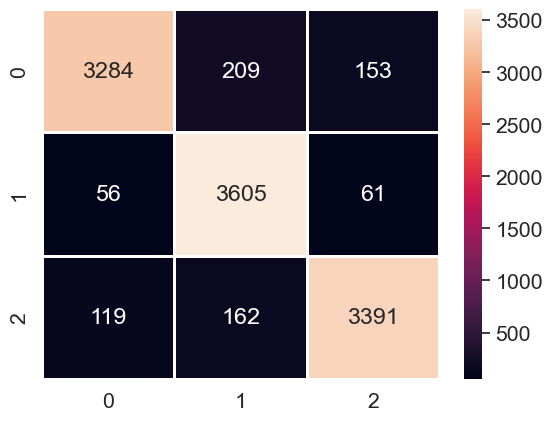

In [70]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.895018115942029

In [73]:
pred = classifier.predict(X_test)

In [74]:
comment=['this product is poor quality','After trying many products of different brands, this one is the best!!','I Am Jonas']

tf1_comment = tf_vector.transform(comment)

classifier.predict(tf1_comment)

array([0, 2, 1])

Confusion Matrix

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3646
           1       0.92      0.94      0.93      3722
           2       0.89      0.85      0.87      3672

    accuracy                           0.90     11040
   macro avg       0.89      0.89      0.89     11040
weighted avg       0.90      0.90      0.89     11040



<Axes: >

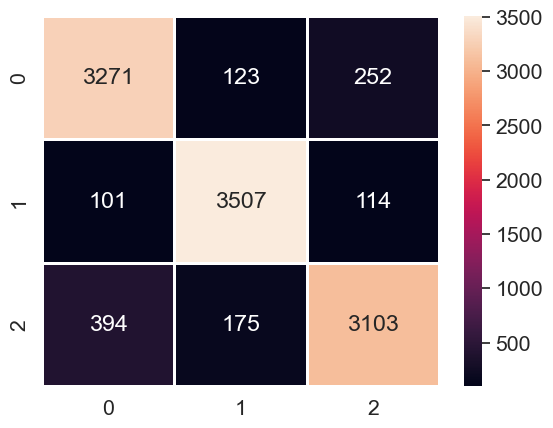

In [76]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
 
model=LogisticRegression()
 
#Model fitting
model.fit(X_train,y_train)
 
#testing the model
model.score(X_test,y_test)

0.8884963768115942

In [78]:
pred = model.predict(X_test)

In [79]:
comment=['it is bad product','this product is good for me and I am satisfied with this product','i am minhaj']

tf1_comment = tf_vector.transform(comment)

model.predict(tf1_comment)

array([0, 2, 1])

Confusion Matrix

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3646
           1       0.85      0.95      0.90      3722
           2       0.93      0.85      0.89      3672

    accuracy                           0.89     11040
   macro avg       0.89      0.89      0.89     11040
weighted avg       0.89      0.89      0.89     11040



<Axes: >

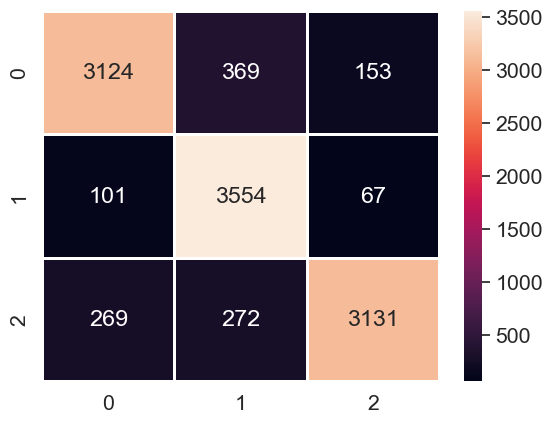

In [81]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Multinomial Naive Bayes

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7958333333333333

In [84]:
import seaborn as sns

In [85]:
pred = model.predict(X_test)

In [86]:
comment=['Bad qualilty..... material qualilty is very poor',
         'Best service ever. On time, products as promised. Great quality.',
         'I buy this product from bangladesh']
tf1_comment = tf_vector.transform(comment)
model.predict(tf1_comment)

array([0, 2, 1])

Confusion Matrix

In [87]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred))


Classification Report

              precision    recall  f1-score   support

           0       0.78      0.88      0.82      3646
           1       0.91      0.65      0.76      3722
           2       0.74      0.86      0.80      3672

    accuracy                           0.80     11040
   macro avg       0.81      0.80      0.79     11040
weighted avg       0.81      0.80      0.79     11040



<Axes: >

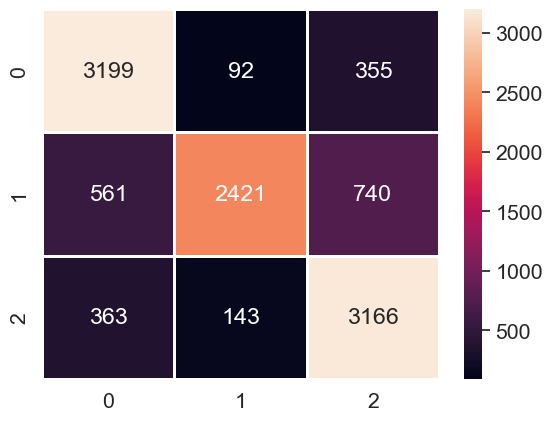

In [88]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

K-Nearest Neighbors Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
#Model fitting
knn.fit(X_train,y_train)
 
#testing the model
knn.score(X_test,y_test)

0.6158514492753623

In [90]:
pred = knn.predict(X_test)

In [ ]:
comment=['this product is poor for me and I am not satisfied with this product',
         'Product is very good, fit is good','where the product is produced']

tf1_comment = tf_vector.transform(comment)

knn.predict(tf1_comment)

array([1, 2, 1])

Confusion Matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3646
           1       0.52      0.95      0.67      3722
           2       0.94      0.08      0.15      3672

    accuracy                           0.62     11040
   macro avg       0.74      0.61      0.53     11040
weighted avg       0.74      0.62      0.53     11040



<Axes: >

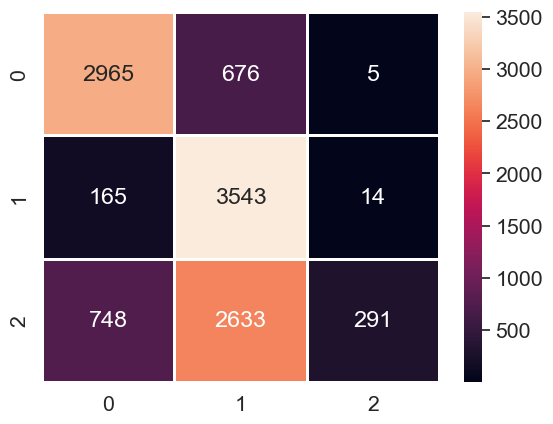

In [93]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Algorithm For Count Vectorizer

over_sampling

In [94]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(vector_test,y)
print(sorted(collections.Counter(y_resampled).items()))

[(np.int64(0), 18400), (np.int64(1), 18400), (np.int64(2), 18400)]


In [95]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.80, shuffle=True, random_state=95)

Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Model fitting
rf.fit(X_train,y_train)
 
#testing the model
rf.score(X_test,y_test)

0.831340579710145

In [97]:
pred = rf.predict(X_test) 

In [98]:
# comment=['Bad qualilty..... material qualilty is very poor',
#          'Best service ever. On time, products as promised. Great quality.',
#          'I buy this product from bangladesh']
comment = ['Best service ever. On time, products as promised. Great quality.']
tf1_comment = vectorizer.transform(comment)
result = rf.predict(tf1_comment)
if result[0] == 1:
  print('neutral')
elif result[0] == 0:
  print('negative')
else:
  print('positive')

positive


Confusion Matrix

In [99]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3646
           1       0.80      0.89      0.84      3722
           2       0.89      0.88      0.88      3672

    accuracy                           0.83     11040
   macro avg       0.83      0.83      0.83     11040
weighted avg       0.83      0.83      0.83     11040



<Axes: >

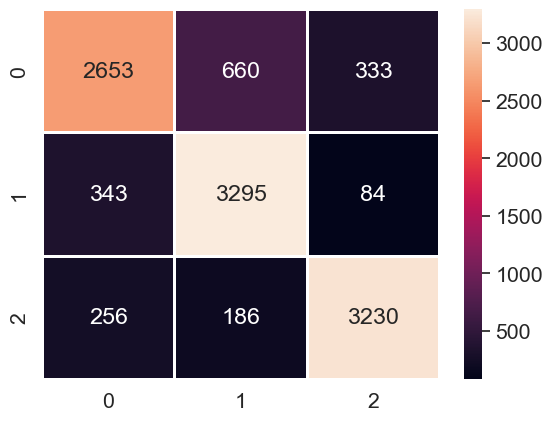

In [100]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Support Vector Machine

In [101]:
from sklearn.svm import SVC

In [102]:
model_svm = SVC()

In [103]:
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

0.8236413043478261

In [104]:
pred = model_svm.predict(X_test)

In [105]:
comment=['this product is poor','Product is very good, fit is good','where the product is produced']
vect_comment = vectorizer.transform(comment)
model_svm.predict(vect_comment)

array([0, 2, 1])

Confusion Matrix

In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73      3646
           1       0.77      0.93      0.84      3722
           2       0.84      0.93      0.88      3672

    accuracy                           0.82     11040
   macro avg       0.83      0.82      0.82     11040
weighted avg       0.83      0.82      0.82     11040



<Axes: >

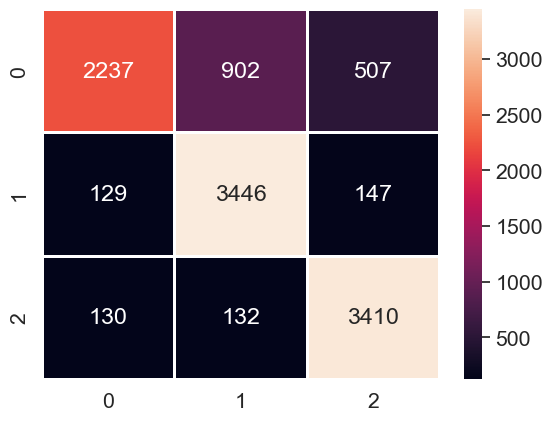

In [107]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.7972826086956522

In [110]:
pred = classifier.predict(X_test)

Confusion Matrix

In [111]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3646
           1       0.78      0.86      0.82      3722
           2       0.89      0.78      0.83      3672

    accuracy                           0.80     11040
   macro avg       0.80      0.80      0.80     11040
weighted avg       0.80      0.80      0.80     11040



<Axes: >

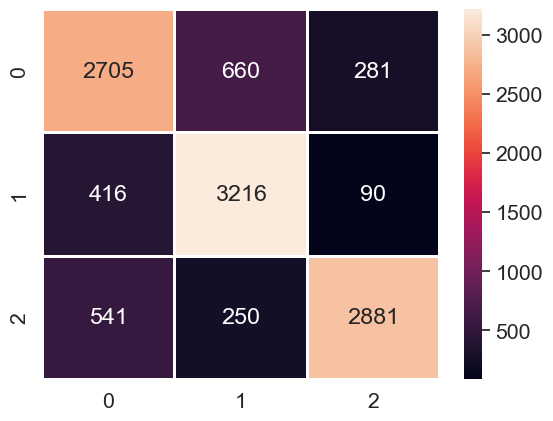

In [112]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
 
model=LogisticRegression()
 
#Model fitting
model.fit(X_train,y_train)
 
#testing the model
model.score(X_test,y_test)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8343297101449275

In [114]:
pred = model.predict(X_test)

Confusion Matrix

In [115]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      3646
           1       0.76      0.93      0.83      3722
           2       0.93      0.88      0.90      3672

    accuracy                           0.83     11040
   macro avg       0.84      0.83      0.83     11040
weighted avg       0.84      0.83      0.83     11040



<Axes: >

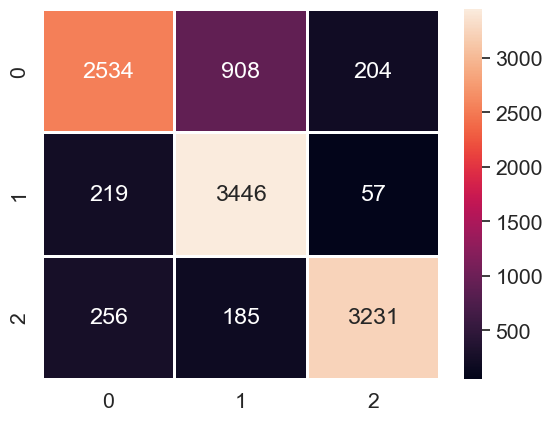

In [116]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

Multinomial Naive Bayes

In [117]:
from sklearn.naive_bayes import MultinomialNB

In [118]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7230072463768116

In [119]:
pred = model.predict(X_test)

Confusion Matrix

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      3646
           1       0.81      0.53      0.64      3722
           2       0.72      0.89      0.80      3672

    accuracy                           0.72     11040
   macro avg       0.74      0.72      0.72     11040
weighted avg       0.74      0.72      0.72     11040



<Axes: >

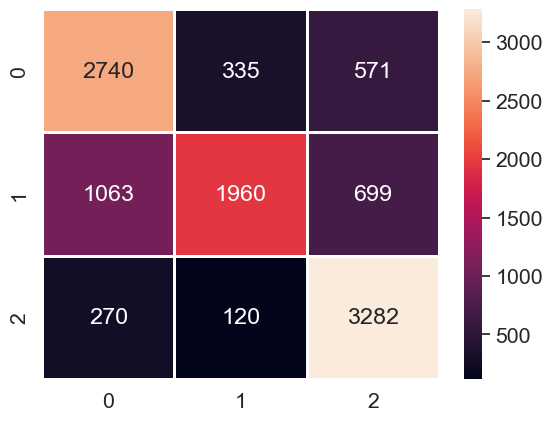

In [121]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

K-Nearest Neighbors Classifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
#Model fitting
knn.fit(X_train,y_train)
 
#testing the model
knn.score(X_test,y_test)

0.6098731884057971

In [123]:
pred = knn.predict(X_test)

Confusion Matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      0.71      0.64      3646
           1       0.57      0.86      0.69      3722
           2       0.97      0.25      0.40      3672

    accuracy                           0.61     11040
   macro avg       0.71      0.61      0.58     11040
weighted avg       0.71      0.61      0.58     11040



<Axes: >

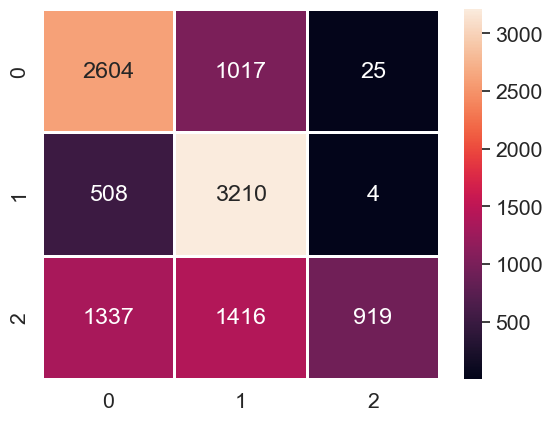

In [125]:
conf_m = confusion_matrix(y_test, pred)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')